In [15]:
import numpy as np
import random
import math

In [100]:
def random_matrix(n: int):
    """
    Returns a numpy matrix of size n by n filled with random numbers 
    """
    res = np.zeros((n, n))
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            res[i][j] = random.gauss(0, 1)
    return res

def hilbert_matrix(n: int):
    """
    Returns a Hilbert matrix of size n by n where 
    a_{ij} = 1/ (i + j - 1)
    """
    res = np.zeros((n , n))
    for i in range(n):
        for j in range(n):
            if i== 0 and j ==0:
                res[i][j] = 1
            else:
                res[i][j] = float(1 / ((i+1) + (j+1) - 1))
    return res

def pascal_matrix(n: int):
    """
    Returns a Pascal matrix of size n with entries 
    a_{ij} = {i + j \choose i}
    """
    res = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            res[i][j] = math.comb(i+j, i)
    return res

def magic_matrix(N: int):
    """
    Returns a magic square of size N by N. 
    Courtesy of https://scipython.com/book/chapter-6-numpy/examples/creating-a-magic-square/
    """
    n = N
    if n%2 == 0:
        # 2-D matrix with all entries as 0 
        arr = [[(n*y)+x+1 for x in range(n)]for y in range(n)] 

        # Change value of array elements at fix location  
        # as per the rule (n*n+1)-arr[i][[j] 

        # Corners of order (n/4)*(n/4) 
        # Top left corner 
        for i in range(0,n//4): 
            for j in range(0,n//4): 
                arr[i][j] = (n*n + 1) - arr[i][j]; 

        # Top right corner 
        for i in range(0,n//4): 
            for j in range(3 * (n//4),n): 
                arr[i][j] = (n*n + 1) - arr[i][j]; 

        # Bottom Left corner 
        for i in range(3 * (n//4),n): 
            for j in range(0,n//4): 
                arr[i][j] = (n*n + 1) - arr[i][j]; 

        # Bottom Right corner 
        for i in range(3 * (n//4),n): 
            for j in range(3 * (n//4),n): 
                arr[i][j] = (n*n + 1) - arr[i][j]; 

        # Centre of matrix,order (n/2)*(n/2) 
        for i in range(n//4,3 * (n//4)): 
            for j in range(n//4,3 * (n//4)): 
                arr[i][j] = (n*n + 1) - arr[i][j]; 
    
        return arr
    
    magic_square = np.zeros((N,N), dtype=int)

    n = 1
    i, j = 0, N//2

    while n <= N**2:
        magic_square[i, j] = n
        n += 1
        newi, newj = (i-1) % N, (j+1)% N
        if magic_square[newi, newj]:
            i += 1
        else:
            i, j = newi, newj
    return magic_square 

def one_vect(n: int):
    """
    Returns a column vector of size n x 1 filled with ones 
    """
    return np.ones((n, 1))

def mat_vec_mult(A: np.ndarray, x: np.array):
    """
    Returns the multiplication of Ax. Has no protection on it
    so be careful.
    """
    return np.matmul(A, x)

def det_11 (A: np.array):
    """
    Computes the a_11 entry of the inverse of A, assuming A meets the 
    conditions for being invertible.
    This will take advantage of an element wise defintion of the inverse.
    """
    minor = A[1:, 1:]
    detminor = np.linalg.det(minor)
    return float(A[0][0] / detminor)

In [66]:
xhats = []
deltab = []

#x - xhat / mag x
xmag1 = []
xmag2 = []
xmaginf = []

#cond numbers
con1 = []
con2 = []
coninf = []

#max b * cond
relcon1 = []
relcon2 = []
relconinf = []

for inc in range(5, 505, 5):
    vec = one_vect(inc)
    ran = random_matrix(inc)
    hil = hilbert_matrix(inc)
    pas = pascal_matrix(inc)
    mag = magic_matrix(inc)
    
    ransol = np.matmul(np.linalg.pinv(ran), vec)
    hilsol = np.matmul(np.linalg.pinv(hil), vec)
    passol = np.matmul(np.linalg.pinv(pas), vec)
    magsol = np.matmul(np.linalg.pinv(mag), vec)
    
    dbran = np.matmul(ran, ransol) - mat_vec_mult(ran, vec) 
    dbhil = np.matmul(hil, hilsol) - mat_vec_mult(hil, vec)
    dbpas = np.matmul(pas, passol) - mat_vec_mult(pas, vec)
    dbmag = np.matmul(mag, magsol) - mat_vec_mult(mag, vec)
    
    magran1 = np.linalg.norm(vec - ransol, ord= 1) / np.linalg.norm(vec, ord = 1)
    maghil1 = np.linalg.norm(vec - hilsol, ord= 1) / np.linalg.norm(vec, ord = 1)
    magpas1 = np.linalg.norm(vec - passol, ord= 1) / np.linalg.norm(vec, ord = 1)
    magmag1 = np.linalg.norm(vec - magsol, ord= 1) / np.linalg.norm(vec, ord = 1)
    
    
    magran2 = np.linalg.norm(vec - ransol, ord= 2) / np.linalg.norm(vec, ord = 2)
    maghil2 = np.linalg.norm(vec - hilsol, ord= 2) / np.linalg.norm(vec, ord = 2)
    magpas2 = np.linalg.norm(vec - passol, ord= 2) / np.linalg.norm(vec, ord = 2)
    magmag2 = np.linalg.norm(vec - magsol, ord= 2) / np.linalg.norm(vec, ord = 2)
    
    
    magraninf = np.linalg.norm(vec - ransol, ord= np.inf) / np.linalg.norm(vec, ord = np.inf)
    maghilinf = np.linalg.norm(vec - hilsol, ord= np.inf) / np.linalg.norm(vec, ord = np.inf)
    magpasinf = np.linalg.norm(vec - passol, ord= np.inf) / np.linalg.norm(vec, ord = np.inf)
    magmaginf = np.linalg.norm(vec - magsol, ord= np.inf) / np.linalg.norm(vec, ord = np.inf)
    
    rancon1 = np.linalg.cond(ran, p=1)
    hilcon1 = np.linalg.cond(hil, p=1)
    pascon1 = np.linalg.cond(pas, p=1)
    magcon1 = np.linalg.cond(mag, p=1)

    rancon2 = np.linalg.cond(ran, p=2)
    hilcon2 = np.linalg.cond(hil, p=2)
    pascon2 = np.linalg.cond(pas, p=2)
    magcon2 = np.linalg.cond(mag, p=2)

    ranconinf = np.linalg.cond(ran, p=np.inf)
    hilconinf = np.linalg.cond(hil, p=np.inf)
    pasconinf = np.linalg.cond(pas, p=np.inf)
    magconinf = np.linalg.cond(mag, p=np.inf)
    
    relconran1 = rancon1 * np.linalg.norm(dbran, ord = 1) / np.linalg.norm(vec, ord = 1)
    relconhil1 = hilcon1 * np.linalg.norm(dbhil, ord = 1) / np.linalg.norm(vec, ord = 1)
    relconpas1 = pascon1 * np.linalg.norm(dbpas, ord = 1) / np.linalg.norm(vec, ord = 1)
    relconmag1 = magcon1 * np.linalg.norm(dbmag, ord = 1) / np.linalg.norm(vec, ord = 1)
    
    relconran2 = rancon2 * np.linalg.norm(dbran, ord = 2) / np.linalg.norm(vec, ord = 2)
    relconhil2 = hilcon2 * np.linalg.norm(dbhil, ord = 2) / np.linalg.norm(vec, ord = 2)
    relconpas2 = pascon2 * np.linalg.norm(dbpas, ord = 2) / np.linalg.norm(vec, ord = 2)
    relconmag2 = magcon2 * np.linalg.norm(dbmag, ord = 2) / np.linalg.norm(vec, ord = 2)
    
    relconraninf = ranconinf * np.linalg.norm(dbran, ord = np.inf) / np.linalg.norm(vec, ord = np.inf)
    relconhilinf = hilconinf * np.linalg.norm(dbhil, ord = np.inf) / np.linalg.norm(vec, ord = np.inf)
    relconpasinf = pasconinf * np.linalg.norm(dbpas, ord = np.inf) / np.linalg.norm(vec, ord = np.inf)
    relconmaginf = magconinf * np.linalg.norm(dbmag, ord = np.inf) / np.linalg.norm(vec, ord = np.inf)
    
    temp11 = [relconraninf, relconhilinf, relconpasinf, relconmaginf]
    temp10 = [relconran2, relconhil2, relconpas2, relconmag2]
    temp9 = [relconran1, relconhil1, relconpas1, relconmag1]
    temp8 = [ranconinf, hilconinf, pasconinf, magconinf]
    temp7 = [rancon2, hilcon2, pascon2, magcon2]
    temp6 = [rancon1, hilcon1, pascon1, magcon1]
    temp5 = [magran1, maghil1, magpas1, magmag1]
    temp4 = [magran2, maghil2, magpas2, magmag2]
    temp3 = [magraninf, maghilinf, magpasinf, magmaginf]
    temp2 = [dbran, dbhil, dbpas, dbmag]
    temp1 = [ransol, hilsol, passol, magsol]
    
    xhats.append(temp1)
    deltab.append(temp2)
    xmag1.append(temp5)
    xmag2.append(temp4)
    xmaginf.append(temp3)
    con1.append(temp6)
    con2.append(temp7)
    coninf.append(temp8)
    relcon1.append(temp9)
    relcon2.append(temp10)
    relconinf.append(temp11)

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255


C:\Users\Caleb\AppData\Local\Temp\ipykernel_2376\1907812779.py:76: RuntimeWarning: overflow encountered in scalar multiply
  relconpas2 = pascon2 * np.linalg.norm(dbpas, ord = 2) / np.linalg.norm(vec, ord = 2)


260


C:\Users\Caleb\AppData\Local\Temp\ipykernel_2376\1907812779.py:71: RuntimeWarning: overflow encountered in scalar multiply
  relconpas1 = pascon1 * np.linalg.norm(dbpas, ord = 1) / np.linalg.norm(vec, ord = 1)
C:\Users\Caleb\AppData\Local\Temp\ipykernel_2376\1907812779.py:81: RuntimeWarning: overflow encountered in scalar multiply
  relconpasinf = pasconinf * np.linalg.norm(dbpas, ord = np.inf) / np.linalg.norm(vec, ord = np.inf)


265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500


In [68]:
import pandas as pd

In [74]:
data = {
    'xmag1': xmag1[0],
    'xmag2': xmag2[0],
    'xmaginf': xmaginf[0],
    'condition1': con1[0],
    'condition2': con2[0],
    'conditioninf': coninf[0],
    'relcon1': relcon1[0],
    'relcon2': relcon2[0],
    'relconinf': relconinf[0]
}

row_names = ['random', 'hilbert', 'pascal', 'magic']

df = pd.DataFrame(data, index=row_names)
df

,xmag1,xmag2,xmaginf,condition1,condition2,conditioninf,relcon1,relcon2,relconinf
random,0.925476,1.030888,1.350415,12.553461,5.618668,15.132394,26.790832,13.463444,4.497819e+01
hilbert,500.800000,642.274085,1121.000000,943656.000006,476607.250242,943656.000006,414459.706669,296578.659617,1.211025e+06
pascal,0.800000,0.894427,1.000000,15624.000000,8517.524361,15624.000000,768700.800000,561820.968799,1.953000e+06
magic,0.984615,0.984615,0.984615,6.850000,5.461822,6.850000,438.400000,349.556639,4.384000e+02


In [75]:
import matplotlib.pyplot as plt

In [79]:
xmag1 = np.array(xmag1)
xmag2 = np.array(xmag2)
xmaginf = np.array(xmaginf)
condition1 = np.array(con1)
condition2 = np.array(con2)
conditioninf = np.array(coninf)
relcon1 = np.array(relcon1)
relcon2 = np.array(relcon2)
relconinf = np.array(relconinf)

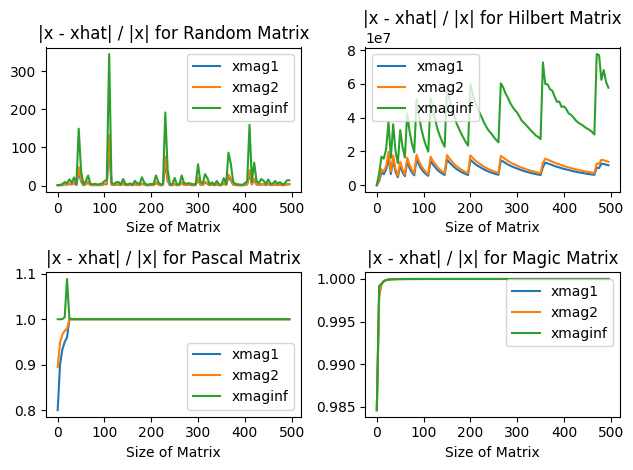

In [95]:
plt.subplot(2, 2, 1)
plt.plot(range(0, 500, 5), xmag1[:, 0], label= 'xmag1')
plt.plot(range(0, 500, 5), xmag2[:, 0], label= 'xmag2')
plt.plot(range(0, 500, 5), xmaginf[:, 0], label= 'xmaginf')
plt.title("|x - xhat| / |x| for Random Matrix")
plt.xlabel("Size of Matrix")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(range(0, 500, 5), xmag1[:, 1], label= 'xmag1')
plt.plot(range(0, 500, 5), xmag2[:, 1], label= 'xmag2')
plt.plot(range(0, 500, 5), xmaginf[:, 1], label= 'xmaginf')
plt.title("|x - xhat| / |x| for Hilbert Matrix")
plt.xlabel("Size of Matrix")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(range(0, 500, 5), xmag1[:, 2], label= 'xmag1')
plt.plot(range(0, 500, 5), xmag2[:, 2], label= 'xmag2')
plt.plot(range(0, 500, 5), xmaginf[:, 2], label= 'xmaginf')
plt.title("|x - xhat| / |x| for Pascal Matrix")
plt.xlabel("Size of Matrix")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(0, 500, 5), xmag1[:, 3], label= 'xmag1')
plt.plot(range(0, 500, 5), xmag2[:, 3], label= 'xmag2')
plt.plot(range(0, 500, 5), xmaginf[:, 3], label= 'xmaginf')
plt.title("|x - xhat| / |x| for Magic Matrix")
plt.xlabel("Size of Matrix")
plt.legend()

plt.tight_layout()

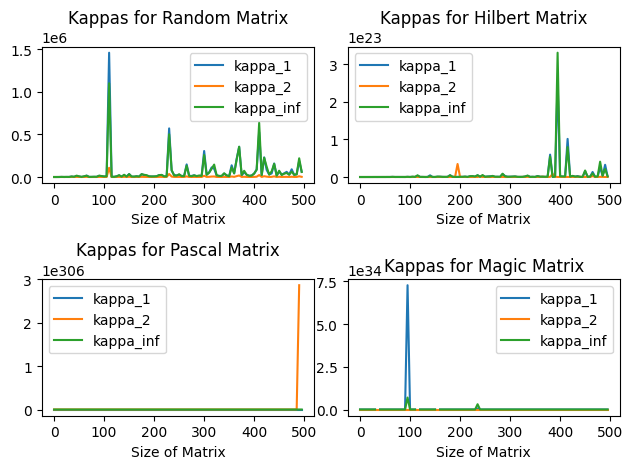

In [97]:
plt.subplot(2, 2, 1)
plt.plot(range(0, 500, 5), condition1[:, 0], label= 'kappa_1')
plt.plot(range(0, 500, 5), condition2[:, 0], label= 'kappa_2')
plt.plot(range(0, 500, 5), conditioninf[:, 0], label= 'kappa_inf')
plt.title("Kappas for Random Matrix")
plt.xlabel("Size of Matrix")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(range(0, 500, 5), condition1[:, 1], label= 'kappa_1')
plt.plot(range(0, 500, 5), condition2[:, 1], label= 'kappa_2')
plt.plot(range(0, 500, 5), conditioninf[:, 1], label= 'kappa_inf')
plt.title("Kappas for Hilbert Matrix")
plt.xlabel("Size of Matrix")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(range(0, 500, 5), condition1[:, 2], label= 'kappa_1')
plt.plot(range(0, 500, 5), condition2[:, 2], label= 'kappa_2')
plt.plot(range(0, 500, 5), conditioninf[:, 2], label= 'kappa_inf')
plt.title("Kappas for Pascal Matrix")
plt.xlabel("Size of Matrix")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(0, 500, 5), condition1[:, 3], label= 'kappa_1')
plt.plot(range(0, 500, 5), condition2[:, 3], label= 'kappa_2')
plt.plot(range(0, 500, 5), conditioninf[:, 3], label= 'kappa_inf')
plt.title("Kappas for Magic Matrix")
plt.xlabel("Size of Matrix")
plt.legend()

plt.tight_layout()

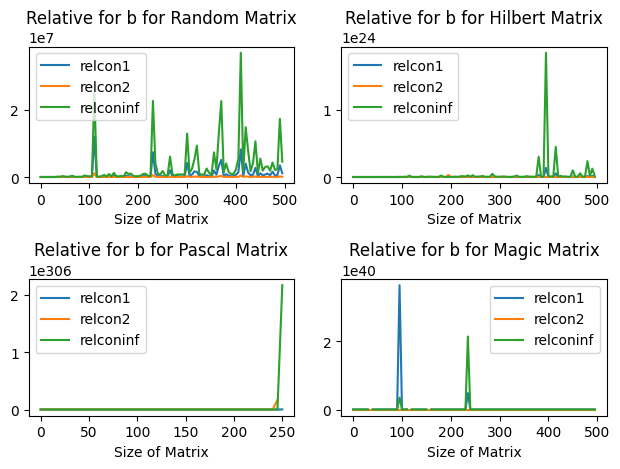

In [99]:
plt.subplot(2, 2, 1)
plt.plot(range(0, 500, 5), relcon1[:, 0], label= 'relcon1')
plt.plot(range(0, 500, 5), relcon2[:, 0], label= 'relcon2')
plt.plot(range(0, 500, 5), relconinf[:, 0], label= 'relconinf')
plt.title("Relative for b for Random Matrix")
plt.xlabel("Size of Matrix")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(range(0, 500, 5), relcon1[:, 1], label= 'relcon1')
plt.plot(range(0, 500, 5), relcon2[:, 1], label= 'relcon2')
plt.plot(range(0, 500, 5), relconinf[:, 1], label= 'relconinf')
plt.title("Relative for b for Hilbert Matrix")
plt.xlabel("Size of Matrix")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(range(0, 500, 5), relcon1[:, 2], label= 'relcon1')
plt.plot(range(0, 500, 5), relcon2[:, 2], label= 'relcon2')
plt.plot(range(0, 500, 5), relconinf[:, 2], label= 'relconinf')
plt.title("Relative for b for Pascal Matrix")
plt.xlabel("Size of Matrix")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(0, 500, 5), relcon1[:, 3], label= 'relcon1')
plt.plot(range(0, 500, 5), relcon2[:, 3], label= 'relcon2')
plt.plot(range(0, 500, 5), relconinf[:, 3], label= 'relconinf')
plt.title("Relative for b for Magic Matrix")
plt.xlabel("Size of Matrix")
plt.legend()

plt.tight_layout()

In [103]:
U = np.array([[1, 1, 1],
              [4, 7, 6],
              [7, 8, 9]])
det_11(U)

0.0666666666666667